In [0]:
import numpy as np
from PIL import Image
import random
from copy import deepcopy
import PIL
import copy 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!mkdir Overlay
%cd Overlay
!mkdir Fg-Bg
!mkdir Fg-Bg-Mask

%ls

/content/Overlay
Fg-Bg/  Fg-Bg-Mask/


In [4]:
%pwd

'/content/Overlay'

In [5]:
%cd ..

/content


In [0]:
def changeImageSize(maxWidth,maxHeight,image):
    widthRatio = maxWidth / image.size[0]
    heightRatio = maxHeight / image.size[1]
    newWidth = int(widthRatio * image.size[0])
    newHeight = int(heightRatio * image.size[1])
    newImage = image.resize((newWidth, newHeight))
    return newImage
    

In [0]:

%pwd
%ls -ls gdrive/My\ Drive/Mask_Rcnn

ls: cannot access 'gdrive/My Drive/Mask_Rcnn': No such file or directory


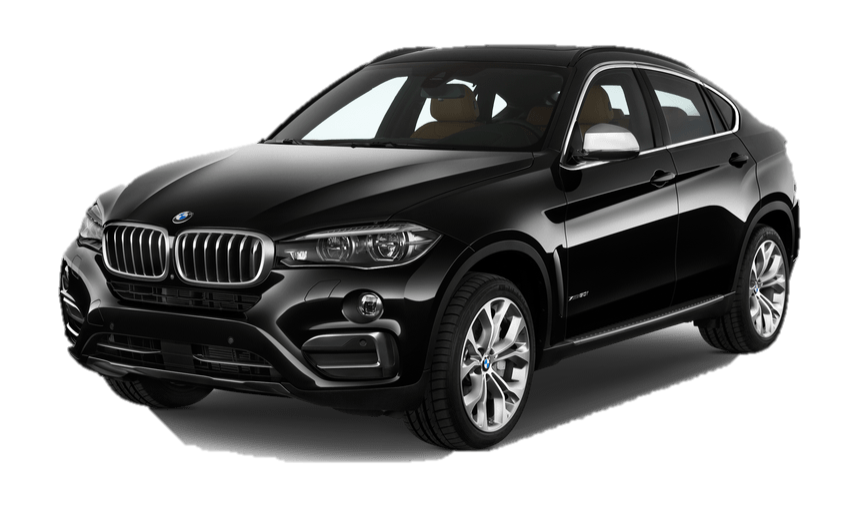

In [7]:
path = '/content/gdrive/My Drive/Mask_Rcnn/'

Image.open(f'{path}fg/car_{str(0)}.jpg')

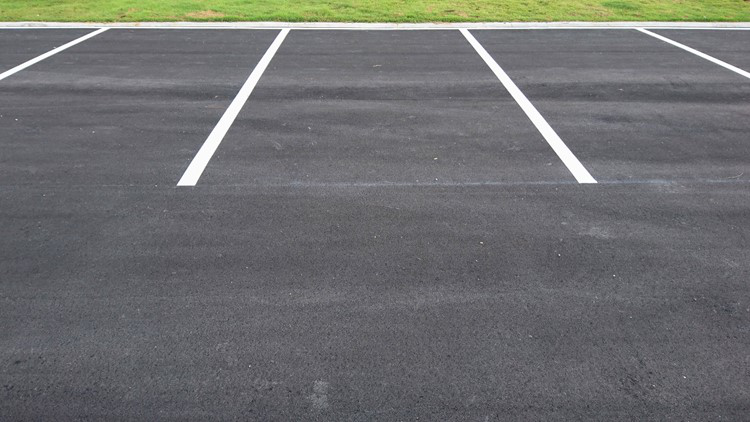

In [8]:
Image.open(f'{path}bg/park{str(51)}.jpg')

In [9]:
path = '/content/gdrive/My Drive/Mask_Rcnn/'
start = 34001
black = np.zeros((224,224))


for i in range(1,101):
    try:
        bg = Image.open(f'{path}bg/park{str(i)}.jpg')
        bg = changeImageSize(250, 250, bg)
        print(f'{path}bg/park{str(i)}.jpg')
    except :
        print("park not found")
        continue
        
    for j in  range(0,109):
        try:
            fg = Image.open(f'{path}fg/car_{str(j)}.jpg')
            fg = changeImageSize(170, 150, fg)
            print(f'{path}fg/car_{str(j)}.jpg')
            mask = Image.open(f'{path}fg_mask/newcar_{str(j)}.jpg')
            mask = changeImageSize(170, 150, mask).convert('1')
        except :
            print("Name not found ")
            continue
        
        for k in range(1,21):
            r1 = random.randint(1, 80)
            r2 = random.randint(1, 80)
            bg1 = copy.deepcopy(bg)
            bg2 = copy.deepcopy(bg)
            fg1 = copy.deepcopy(fg)
            m1 = copy.deepcopy(mask)
            black_img1 = Image.fromarray(black,mode='1')
            black_img2 = Image.fromarray(black,mode='1')
            
            flipfg = fg1.transpose(PIL.Image.FLIP_LEFT_RIGHT) 
            flipmask = m1.transpose(PIL.Image.FLIP_LEFT_RIGHT) 
            
            bg1.paste(fg1, (r1,r2),fg1)
            bg2.paste(flipfg,(r1,r2),flipfg)
            black_img1.paste(m1,(r1,r2), m1)
            black_img2.paste(flipmask,(r1,r2), flipmask)
            
            bg1.save(f"/content/Overlay/Fg-Bg/fg-bg{str(start)}.jpg",optimize=True, quality=30)
            black_img1.save(f"/content/Overlay/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg",optimize=True, quality=30) 
            
            start+=1
            
            bg2.save(f"/content/Overlay/Fg-Bg/fg-bg{str(start)}.jpg", optimize=True, quality=30)
            black_img2.save(f"/content/Overlay/Fg-Bg-Mask/fg-bg-mask{str(start)}.jpg", optimize=True, quality=30)\
            
            start+=1
            print(start)

Streaming output truncated to the last 5000 lines.
424525
424527
424529
424531
424533
424535
424537
424539
424541
424543
424545
424547
424549
424551
424553
424555
424557
424559
424561
/content/gdrive/My Drive/Mask_Rcnn/fg/car_69.jpg
424563
424565
424567
424569
424571
424573
424575
424577
424579
424581
424583
424585
424587
424589
424591
424593
424595
424597
424599
424601
/content/gdrive/My Drive/Mask_Rcnn/fg/car_70.jpg
424603
424605
424607
424609
424611
424613
424615
424617
424619
424621
424623
424625
424627
424629
424631
424633
424635
424637
424639
424641
/content/gdrive/My Drive/Mask_Rcnn/fg/car_71.jpg
424643
424645
424647
424649
424651
424653
424655
424657
424659
424661
424663
424665
424667
424669
424671
424673
424675
424677
424679
424681
/content/gdrive/My Drive/Mask_Rcnn/fg/car_72.jpg
424683
424685
424687
424689
424691
424693
424695
424697
424699
424701
424703
424705
424707
424709
424711
424713
424715
424717
424719
424721
Name not found 
/content/gdrive/My Drive/Mask_Rcnn/fg/car_74

In [10]:
%ls /content/Overlay/Fg-Bg-Mask/ | wc -l

400000


In [11]:
#Export Zip file
from zipfile import ZipFile 
import zipfile
import os 
  
def get_all_file_paths(directory): 
  
    # initializing empty file paths list 
    file_paths = [] 
  
    # crawling through directory and subdirectories 
    for root, directories, files in os.walk(directory): 
        for filename in files: 
            # join the two strings in order to form the full filepath. 
            filepath = os.path.join(root, filename) 
            file_paths.append(filepath) 
  
    # returning all file paths 
    return file_paths         
  
def main(): 
    # path to folder which needs to be zipped 
    directory = 'Overlay'
  
    # calling function to get all file paths in the directory 
    file_paths = get_all_file_paths(directory) 
  
    # printing the list of all files to be zipped 
    print('Following files will be zipped:') 
    for file_name in file_paths: 
        print(file_name) 
  
    # writing files to a zipfile 
    with ZipFile('/content/gdrive/My Drive/Mask_Rcnn/dataset_final','a', compression = zipfile.ZIP_DEFLATED) as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(file) 
  
    print('All files zipped successfully!')         
  
  

main()

Streaming output truncated to the last 5000 lines.
Overlay/Fg-Bg/fg-bg300021.jpg
Overlay/Fg-Bg/fg-bg86495.jpg
Overlay/Fg-Bg/fg-bg88828.jpg
Overlay/Fg-Bg/fg-bg171674.jpg
Overlay/Fg-Bg/fg-bg197300.jpg
Overlay/Fg-Bg/fg-bg403527.jpg
Overlay/Fg-Bg/fg-bg64149.jpg
Overlay/Fg-Bg/fg-bg63346.jpg
Overlay/Fg-Bg/fg-bg197203.jpg
Overlay/Fg-Bg/fg-bg409265.jpg
Overlay/Fg-Bg/fg-bg280269.jpg
Overlay/Fg-Bg/fg-bg96476.jpg
Overlay/Fg-Bg/fg-bg257609.jpg
Overlay/Fg-Bg/fg-bg71590.jpg
Overlay/Fg-Bg/fg-bg195334.jpg
Overlay/Fg-Bg/fg-bg226870.jpg
Overlay/Fg-Bg/fg-bg285318.jpg
Overlay/Fg-Bg/fg-bg162001.jpg
Overlay/Fg-Bg/fg-bg228231.jpg
Overlay/Fg-Bg/fg-bg351655.jpg
Overlay/Fg-Bg/fg-bg76247.jpg
Overlay/Fg-Bg/fg-bg285460.jpg
Overlay/Fg-Bg/fg-bg406730.jpg
Overlay/Fg-Bg/fg-bg257775.jpg
Overlay/Fg-Bg/fg-bg243406.jpg
Overlay/Fg-Bg/fg-bg217261.jpg
Overlay/Fg-Bg/fg-bg61907.jpg
Overlay/Fg-Bg/fg-bg379551.jpg
Overlay/Fg-Bg/fg-bg264525.jpg
Overlay/Fg-Bg/fg-bg278675.jpg
Overlay/Fg-Bg/fg-bg300155.jpg
Overlay/Fg-Bg/fg-bg187672.j

In [12]:
%ls /content/Overlay/Fg-Bg/ | wc -l

400000


In [5]:

#To import zip file
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/gdrive/My Drive/Mask_Rcnn/dataset_1to40k"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.printdir() 

    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!')

Streaming output truncated to the last 5000 lines.
Overlay/Fg-Bg/fg-bg54862.jpg                   2020-05-06 17:38:18         5651
Overlay/Fg-Bg/fg-bg42192.jpg                   2020-05-06 17:36:58         7331
Overlay/Fg-Bg/fg-bg42146.jpg                   2020-05-06 17:36:58         7448
Overlay/Fg-Bg/fg-bg66838.jpg                   2020-05-06 17:39:38         4942
Overlay/Fg-Bg/fg-bg46903.jpg                   2020-05-06 17:37:28         6735
Overlay/Fg-Bg/fg-bg76613.jpg                   2020-05-06 17:40:40         5546
Overlay/Fg-Bg/fg-bg64536.jpg                   2020-05-06 17:39:24         5503
Overlay/Fg-Bg/fg-bg46781.jpg                   2020-05-06 17:37:28         7204
Overlay/Fg-Bg/fg-bg74422.jpg                   2020-05-06 17:40:26         5360
Overlay/Fg-Bg/fg-bg46292.jpg                   2020-05-06 17:37:24         6533
Overlay/Fg-Bg/fg-bg58435.jpg                   2020-05-06 17:38:40         5045
Overlay/Fg-Bg/fg-bg70350.jpg                   2020-05-06 17:40:00   

In [6]:
!ls Overlay/Fg-Bg | wc - l

  43560   43560  653400 -
wc: l: No such file or directory
  43560   43560  653400 total


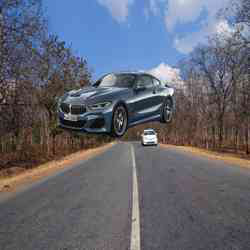

In [9]:

from IPython.display import Image as IMAGE
from PIL import Image,ImageOps
import cv2
from google.colab.patches import cv2_imshow
src = Image.open("Overlay/Fg-Bg/fg-bg40003.jpg")
#img = cv2_imshow(src[:,:,3])
src

In [10]:
import io
with ZipFile("/content/gdrive/My Drive/Mask_Rcnn/dataset_1to40k", 'r') as zip: 

  b = zip.read('Overlay/Fg-Bg/fg-bg40003.jpg')
  #image_data = archive.read("image.png")
  print(b)
  fh = io.BytesIO(b)
  img = Image.open(fh)
  img = img.resize((672,672)) 
  img.save("/content/1.jpg")

  
# # img = cv2_imshow(src[:,:,3])
# src

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x1b\x12\x14\x17\x14\x11\x1b\x17\x16\x17\x1e\x1c\x1b (B+(%%(Q:=0B`Ued_U][jx\x99\x81jq\x90s[]\x85\xb5\x86\x90\x9e\xa3\xab\xad\xabg\x80\xbc\xc9\xba\xa6\xc7\x99\xa8\xab\xa4\xff\xdb\x00C\x01\x1c\x1e\x1e(#(N++N\xa4n]n\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xa4\xff\xc0\x00\x11\x08\x00\xfa\x00\xfa\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x19\x00\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x008\x10\x00\x01\x03\x03\x02\x04\x04\x04\x04\x06\x02\x03\x01\x00\x00\x00\x01\x00\x02\x11\x03!1\x12A\x04"Qa\x132q\x81\x05#\x91\xa1Br\xb1\xd1\x143Rb\xc1\xe1\x92\xf0\x15C\xa2\xf1\xff\xc4\x00\x17\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xc4\x00\x1e\x11\x01\x01\x01\x00

In [11]:
! ls -la /content/

ls: cannot access '/content/drive': Transport endpoint is not connected
total 68
drwxr-xr-x 1 root root  4096 May  7 03:15 .
drwxr-xr-x 1 root root  4096 May  7 03:11 ..
-rw-r--r-- 1 root root 41646 May  7 03:15 1.jpg
drwxr-xr-x 1 root root  4096 May  5 16:13 .config
d????????? ? ?    ?        ?            ? drive
drwx------ 4 root root  4096 May  7 03:12 gdrive
drwxr-xr-x 4 root root  4096 May  7 03:14 Overlay
drwxr-xr-x 1 root root  4096 May  4 16:26 sample_data


In [12]:
!git clone https://github.com/seepala98/DenseDepth.git

Cloning into 'DepthModel'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 245 (delta 124), reused 244 (delta 123), pack-reused 0
Receiving objects: 100% (245/245), 11.81 MiB | 6.39 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [20]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DepthModel/nyu.h5

--2020-05-06 18:59:29--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.41.59
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.41.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DepthModel/nyu.h5’

./DepthModel/nyu.h5 100%[===================>] 164.89M  21.5MB/s    in 8.6s    

2020-05-06 18:59:38 (19.2 MB/s) - ‘./DepthModel/nyu.h5’ saved [172897376/172897376]



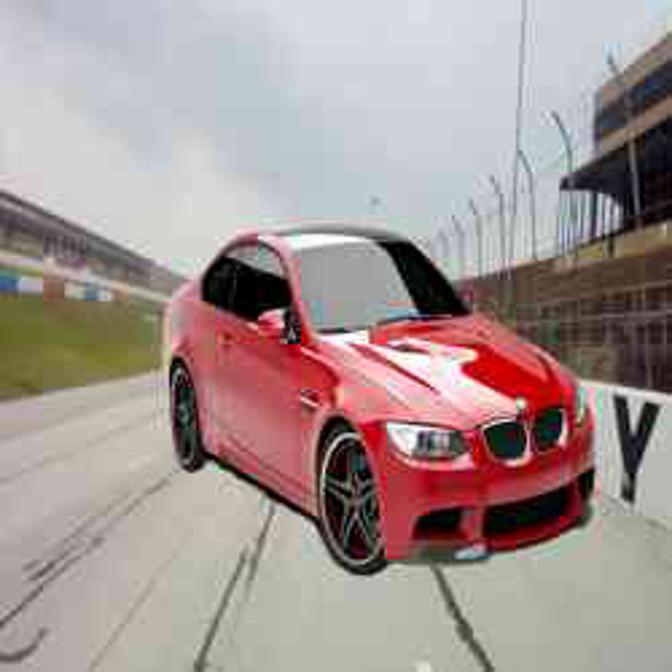

In [39]:
Image.open('1.jpg')

In [40]:
!cd DepthModel; python test.py --input '1.jpg' --end 2

Using TensorFlow backend.
Loading model...

Model loaded (nyu.h5).
Traceback (most recent call last):
  File "test.py", line 33, in <module>
    inputs = load_images( glob.glob(args.input) )
  File "/content/DepthModel/utils.py", line 33, in load_images
    return np.stack(loaded_images, axis=0)
  File "<__array_function__ internals>", line 6, in stack
  File "/usr/local/lib/python3.6/dist-packages/numpy/core/shape_base.py", line 422, in stack
    raise ValueError('need at least one array to stack')
ValueError: need at least one array to stack


In [26]:
!cp Overlay/Fg-Bg/fg-bg382581.jpg  /content/DepthModel/test1.jpg
%ls DepthModel/

augment.py      demo_rgb.npy      LICENSE       PyTorch/     test.py
callbacks.py    DenseDepth.ipynb  loss.py       README.md    train.py
data.py         evaluate.py       model.py      Tensorflow/  utils.py
demo_depth.npy  examples/         nyu.h5        test1.jpg
demo.py         layers.py         __pycache__/  test.png


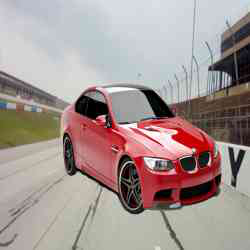

In [27]:
img = Image.open("/content/DepthModel/test1.jpg")

img